In [1]:
from scipy.linalg import eigh
from scipy.sparse import diags
import numpy as np
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=True)

np.set_printoptions(precision=3, suppress=True)

To solve the TISE with a periodic potential like so:
$$\left (\frac{-\hbar^2}{2m} \frac{d^2}{dx^2} + V_0 \cdot \cos^2(\kappa x)\right ) \cdot \psi(x) = E \psi(x)$$


Express position in units of the lattice spacing (a):
$$\tilde{x} = \frac{x}{a}$$
This restricts the domain to [0, 1].

In [2]:
x = np.linspace(0, 1, 1001)
dx = x[1] - x[0]

We can now write the TISE in a dimension-less form like so:

$$\left (-\frac{d^2}{d\tilde{x}^2} + \tilde{V_0} \cdot \cos^2(\kappa \tilde{x})\right ) \cdot \psi(\tilde{x}) = \tilde{E} \psi(\tilde{x})$$

where, the energy/potential quantites are now expressed in the units of $\epsilon$ such that:
$$\epsilon = \frac{\hbar^2}{2ma^2}$$


In [3]:
# V = 1000 * np.concatenate([(np.cos(2 * np.pi * x) ** 2 - 1)[:500], 0.6 * (np.cos(2 * np.pi * x) ** 2 - 1)[500:]])
V = 400 * (np.cos(np.pi * x) ** 2 - 1)

To enforce the periodic potential, we simply have to make sure that V(x=0) = V(x=1), and construct the hamiltonian matrix such that it incorporates periodic boundary conditions.

In [4]:
diag = 2/dx**2 + V
off_diag = - 1/dx**2 * np.ones(x.size - 1)

Hmat = np.diag(diag, k = 0) + np.diag(off_diag, k = -1) + np.diag(off_diag, k = 1)
Hmat[0, -1] = Hmat[-1, 0] = -1/dx**2

E, phi = eigh(Hmat) # evals, evecs

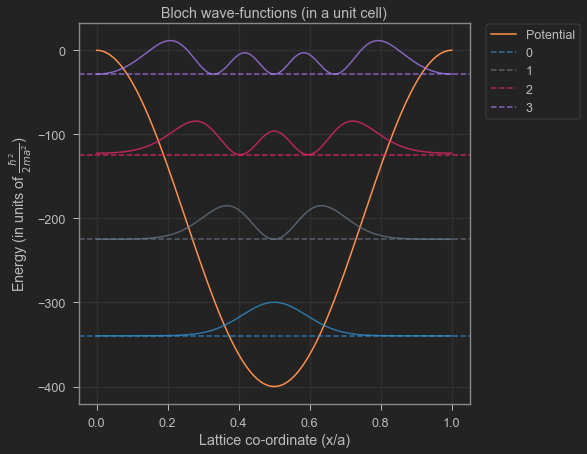

In [5]:
fig = plt.figure(figsize = (7, 7))
plt.plot(x, V, c = "C4", label = "Potential")

for i in range(np.argmax(E > 0)):
    prob = np.abs(phi[:, i])**2
    plt.plot(x, E[i] + 0.1 * np.max(-V)/np.max(prob) * prob, c = f"C{i + 12}", alpha = 0.7)
    plt.axhline(E[i], c = f"C{i + 12}", ls = "dashed", alpha = 0.7, label = f"{i}")

plt.legend(bbox_to_anchor=(1.025, 1.015))
plt.title("Bloch wave-functions (in a unit cell)")
plt.xlabel("Lattice co-ordinate (x/a)")
plt.ylabel(r"Energy (in units of $\frac{\hbar^2}{2ma^2}$)");

In [7]:
print(np.real(E)[:10])

[-339.749 -224.883 -124.252  -28.463    9.507  169.214  170.393  438.693
  438.7    790.255]
